In [1]:
#load all necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import datetime
import glob 
import os

%matplotlib inline

In [2]:
#load dataset
df = pd.read_csv('fordgobike-tripdata.csv')
#tansforming start_time and end_time to datetime data type
df.start_time = pd.to_datetime(df.start_time)
df.end_time = pd.to_datetime(df.end_time)
#Drop NAs
df=df.dropna()
#make a copy
df_copy = df.copy()
#feature engineer weekday
df_copy['weekday'] = df_copy['start_time'].dt.dayofweek

## Data Set Introduction
The data set contains roughly 185000 bike trips from 2019. The variables of interest for this analysis were trip duration, gender and user type (customer versus subscriber).

## Trips taken by customer type and gender
The data shows that the those that use the product the most are subscribers as opposed to customers. It can be clearly seen that male subscribers are the highest user of the product, followed by women. A similar, but much smaller distribution can be seen for customer's. More male customer's tend to use the product as opposed to women.

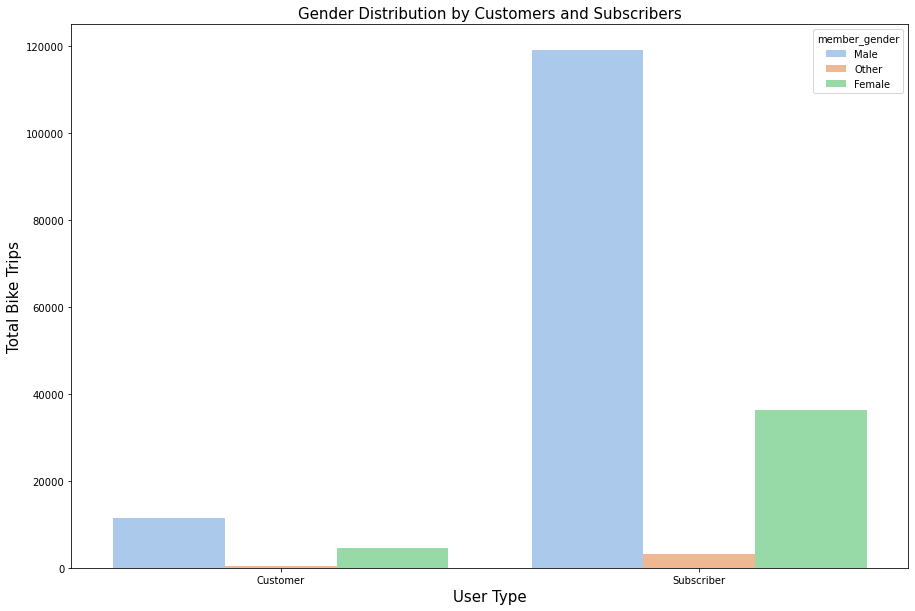

In [3]:
#plot user type and gender against total bike trips
plt.figure(figsize = [15, 10])
g = sns.countplot(data=df_copy, x='user_type',hue='member_gender', palette='pastel')
plt.title('Gender Distribution by Customers and Subscribers',fontsize=15)
g.set_xlabel('User Type', fontsize=15)
g.set_ylabel('Total Bike Trips', fontsize=15);

## Duration of Trips by User Type
An intersting finding was that customers tend to be on take longer trips than subscribers. Customers go on trips of up to 40 minutes, whereas subscribers's longest trips are up to 25 minutes. 

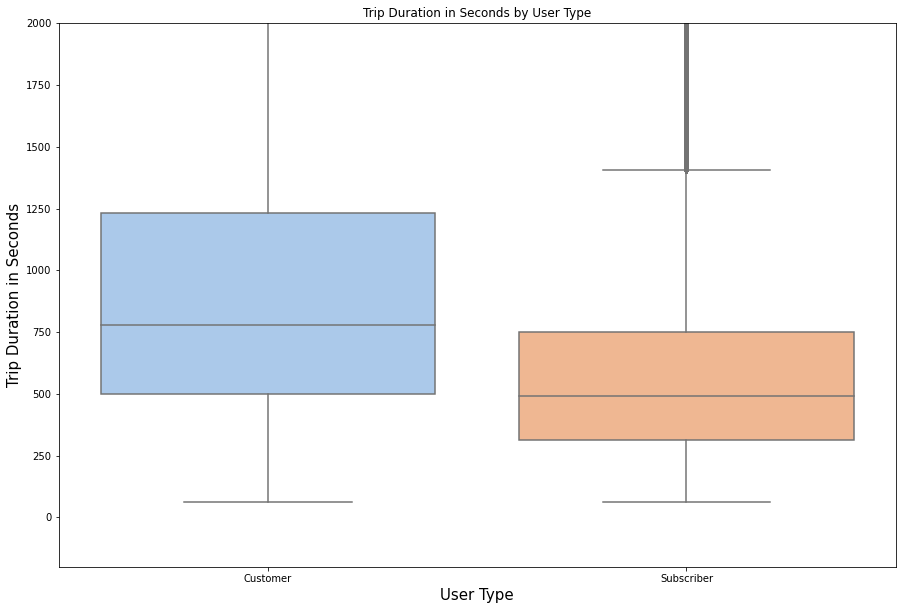

In [4]:
#boxplot user type against duration in seconds
plt.figure(figsize = [15, 10])
sns.boxplot(data = df_copy, x = 'user_type', y = 'duration_sec', palette = 'pastel')
plt.title('User Type and Duration in Seconds', fontsize=15)
plt.ylim([-200, 2000])
plt.title('Trip Duration in Seconds by User Type')
plt.xlabel('User Type', fontsize = 15)
plt.ylabel('Trip Duration in Seconds', fontsize = 15)
plt.show()

## A complementary visualisation to duration of use by user type

Again, the graph shows that customer's tend to use the product for longer durations than subscribers.

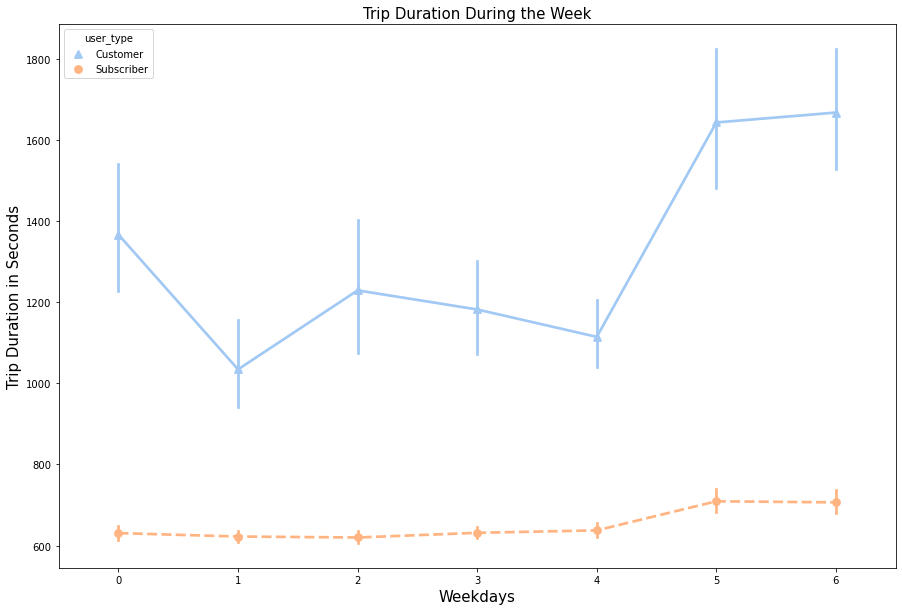

In [5]:
#plot user type and weekdays against duration in seconds
plt.figure(figsize = [15, 10])
mv2 = sns.pointplot(data=df_copy, x='weekday' , y='duration_sec', hue='user_type',
                    markers=["^", "o"], linestyles=["-", "--"], palette='pastel')
plt.xlabel('Weekdays',fontsize=15)
plt.ylabel('Trip Duration in Seconds', fontsize=15)
plt.title('Trip Duration During the Week',fontsize=15);

## Duration of Trips over the course of a week
Customers tend to frequently use the product on Thursdays. It pretty much peaks on Thursdays. Subscribers on the other hand, tend to continously use the product with peaks on Tuesdays and Thursdays. The duration time of the usage is higher for customer's than for subscriber's, which is in line with the above finding. 

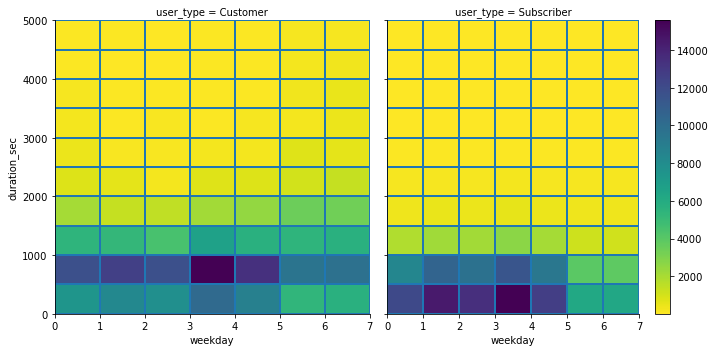

In [6]:
#plot user type and weekdays against duration in seconds
xbin = np.arange(0,7+1,1)
ybin = np.arange(0,5000+500,500)
mv3 = sns.FacetGrid (data = df_copy , col='user_type', height=5)
mv3.map(plt.hist2d, 'weekday', 'duration_sec', cmin=0.5, cmap = 'viridis_r', bins=[xbin,ybin])
plt.colorbar();

## Summary
Male subscriber tend to use the product the most, followed by women. Overall, customer's use the product for longer trips, whereas subscribers use the product continsouly throughout the week. 